In [2]:
import pandas as pd
import numpy as np

In [3]:
#Connect to database

import mysql.connector
import time
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password",
  database="valorant_tracker"
)
cursor = mydb.cursor() 

In [4]:
df = pd.read_sql("SELECT * FROM stats", mydb)
print("Number of samples: " + str(df.shape[0]))

Number of samples: 2380703


In [5]:
df['user_id'] = df['match_player_id'].str[36:]


In [6]:
print(df.columns)

Index(['match_player_id', 'rounds', 'date', 'result', 'map', 'smurf', 'agent',
       'kills', 'headshots', 'deaths', 'assists', 'damage', 'damage_received',
       'econ_rating', 'plants', 'defuses', 'first_bloods', 'grenade_casts',
       'ability_2_casts', 'ability_1_casts', 'ultimate_casts', 'placement',
       'kdratio', 'headshot_percentage', 'first_deaths', 'last_deaths',
       'current_rank', 'user_id'],
      dtype='object')


In [7]:
data = df.drop(["match_player_id", 
"user_id", 
"date", 
"rounds", 
"map", 
"result", 
"agent",
"smurf",
"current_rank",], axis=1)

#Should eventually take into account ability casts for each agent
data = data.drop(["grenade_casts",
"ability_2_casts",
"ability_1_casts",
"ultimate_casts"
], axis=1)


Working with the raw data is difficult since it is not very gaussian. Will instead average all stats and work with a dataset of users.

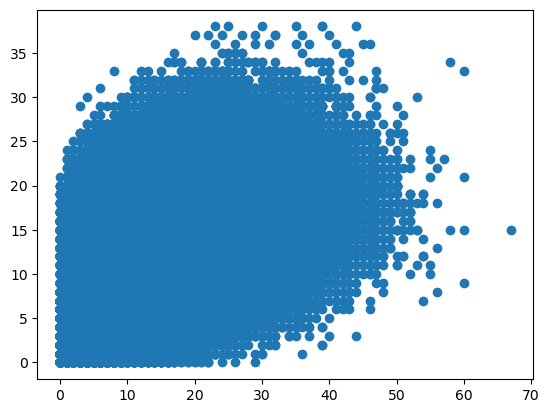

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df["kills"], df["deaths"])

No validation set or test set being used to find optimal epsilon (should consider doing that, however, 0.000001 seems to work fairly well). After checking the accounts below, some of them appear to have two different users. One plays extremely well and the other plays poorly.

In [9]:
sub_data = df[["kills", "deaths", "user_id"]]
avg_data = sub_data.groupby("user_id").mean()


In [80]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.006))
clf = isof.fit(avg_data)

In [81]:
anomaly = clf.predict(avg_data)

In [82]:
test_anomaly = avg_data
test_anomaly["anomaly"] = anomaly.tolist()


In [83]:
anomalies = test_anomaly[(test_anomaly["anomaly"] == -1)]

In [84]:
anomalies.shape[0]

52

In [85]:
anom_true = anomalies[(anomalies["anomaly"] == -1)]

Text(0.5, 1.0, 'Kills Vs Deaths Outliers')

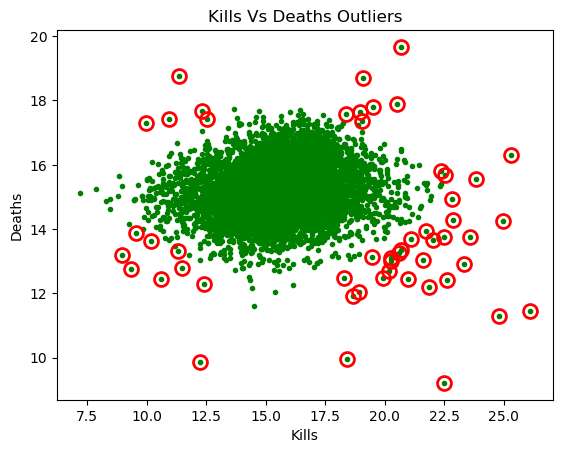

In [16]:
plt.plot(avg_data["kills"], avg_data["deaths"], 'g.')

plt.plot(anom_true["kills"].to_numpy(), anom_true["deaths"].to_numpy(), 'or',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)
plt.xlabel("Kills")
plt.ylabel("Deaths")
plt.title("Kills Vs Deaths Outliers")

In [17]:
anom_true

,kills,deaths,anomaly
user_id,,,
2006 Ford F250#beep,9.333333,12.769231,-1
2321#00000,20.263158,13.105263,-1
AdanNoAim7#6969,18.950000,17.650000,-1
Angelas duo#0000,22.606061,12.424242,-1
BIO GpixL#BIO,18.373333,17.583333,-1
Billy#Bob,18.394231,9.971154,-1
Blade#3091,11.350000,18.750000,-1
Cringe#1578,12.217949,9.858974,-1
Cwammycwam79#nerds,21.850000,12.200000,-1


In [18]:
high_dim_data = df.drop(["match_player_id", 
"date", 
"rounds", 
"map", 
"result", 
"agent",
"smurf",
"current_rank",
"grenade_casts",
"ability_2_casts",
"ability_1_casts",
"ultimate_casts",], axis=1)


In [19]:
avg_high_dim_data = high_dim_data.groupby("user_id").mean()
avg_high_dim_data.head()

,kills,headshots,deaths,assists,damage,damage_received,econ_rating,plants,defuses,first_bloods,placement,kdratio,headshot_percentage,first_deaths,last_deaths
user_id,,,,,,,,,,,,,,,
000#Angel,16.066667,10.460000,14.663333,4.263333,3035.400000,2860.116667,65.773333,0.496667,0.380000,2.316667,5.196667,1.283333,24.110006,1.960000,2.200000
007#0101,16.590000,11.713333,16.253333,3.313333,3047.990000,3089.820000,57.020000,0.436667,0.296667,3.143333,5.050000,1.120000,29.801248,2.993333,1.650000
00Slade#NA1,15.993333,10.493333,14.430000,6.536667,3024.140000,2734.270000,58.663333,1.700000,0.403333,1.833333,5.023333,1.226667,21.784829,1.583333,2.483333
01000101#NA1,14.596667,9.233333,15.190000,5.790000,2785.880000,2926.673333,54.876667,2.526667,0.390000,1.400000,6.306667,1.066667,24.125524,1.336667,2.190000
0ClF#519,15.400000,10.000000,14.930000,4.816667,2872.456667,2831.420000,55.220000,1.426667,0.450000,1.850000,5.770000,1.170000,25.912547,1.900000,2.430000


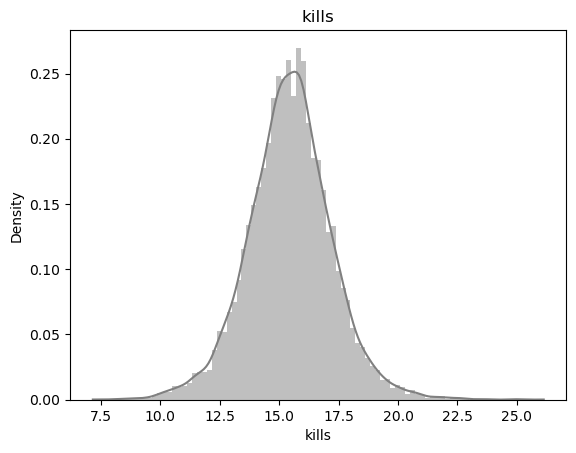

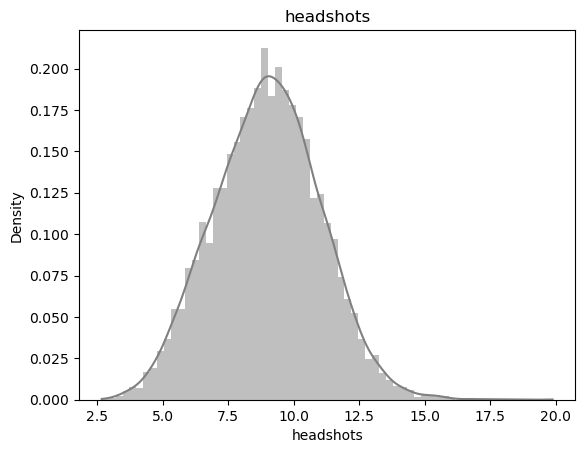

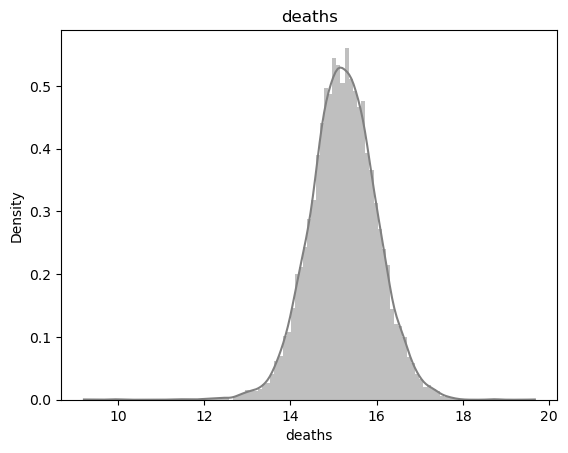

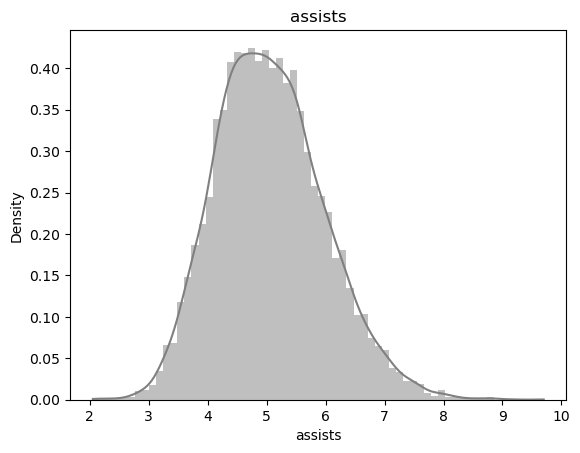

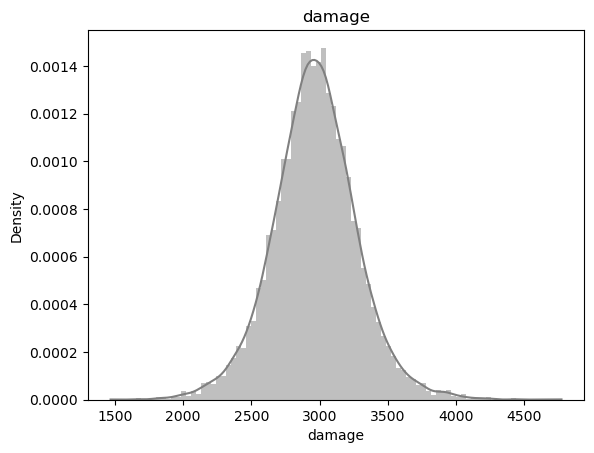

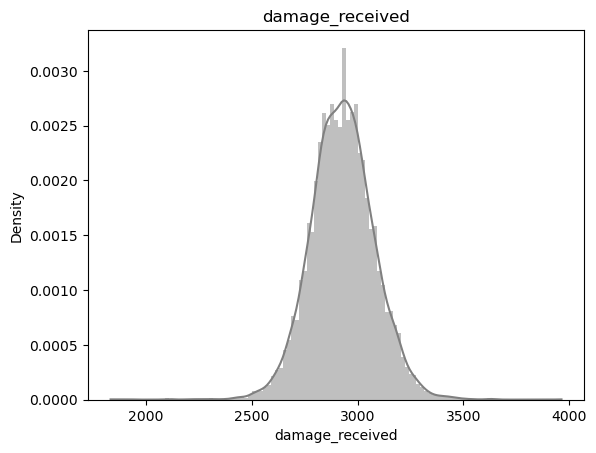

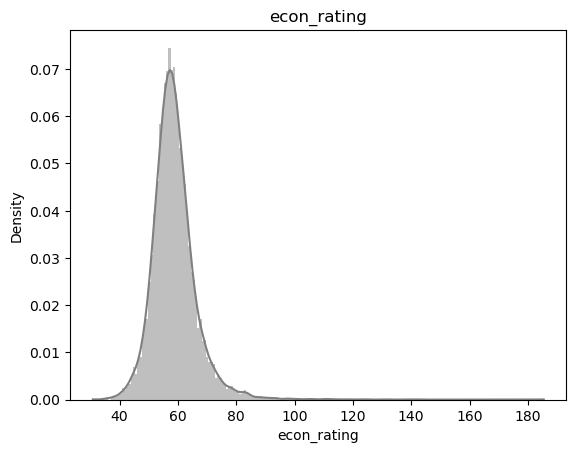

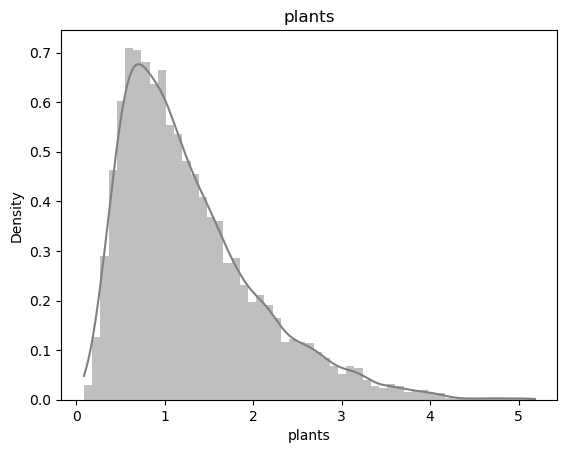

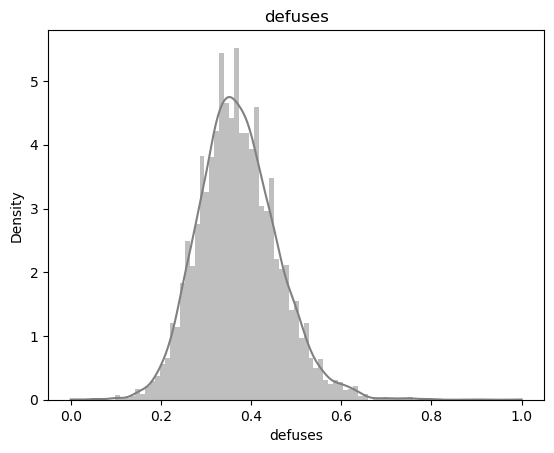

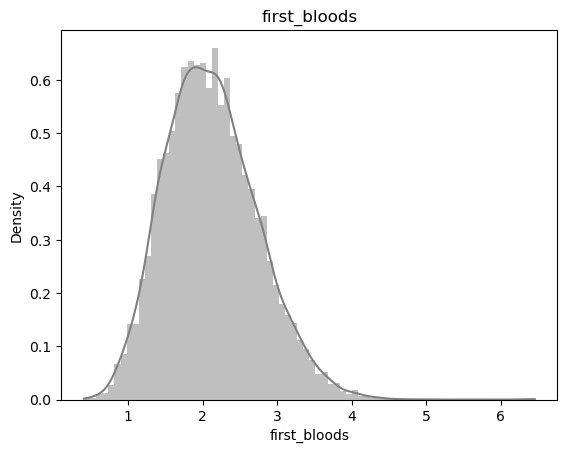

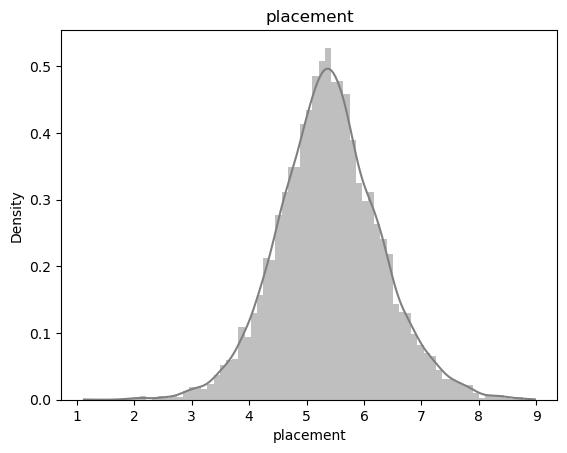

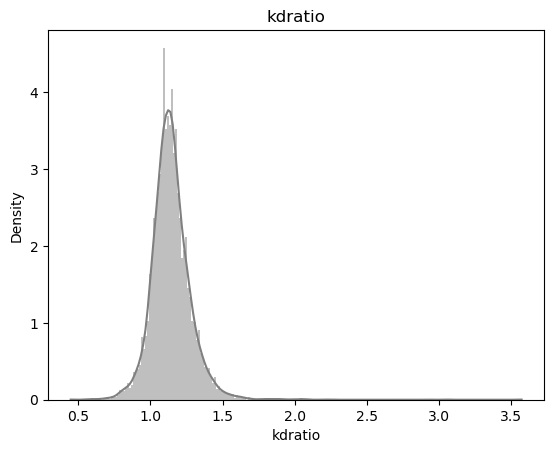

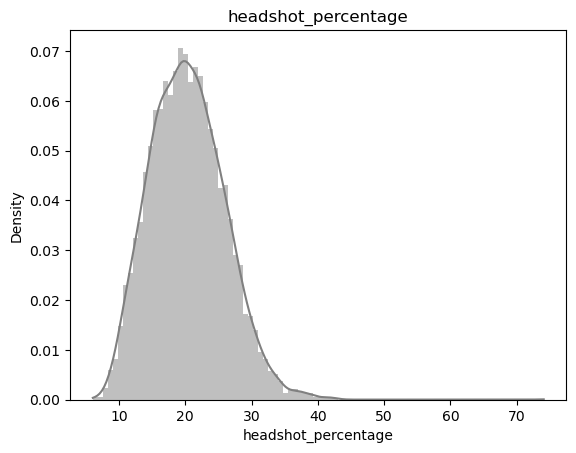

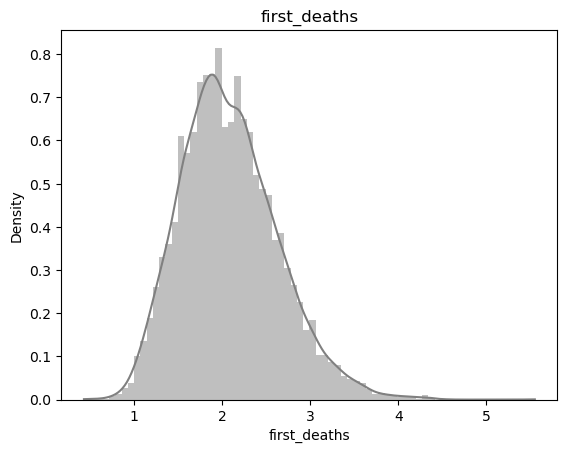

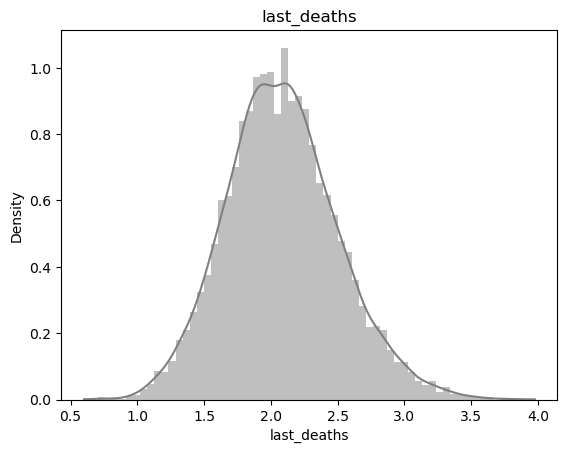

In [20]:
import seaborn as sns
for col in avg_high_dim_data:
    sns.histplot(avg_high_dim_data[col], color="grey", label="100% Equities", kde=True, stat="density", linewidth=0)
    plt.title(col)
    plt.show()

In [21]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.006))
clf = isof.fit(avg_high_dim_data)

In [22]:
anomaly_high_dim = clf.predict(avg_high_dim_data)

In [23]:
test_anomaly_high_dim = avg_high_dim_data
test_anomaly_high_dim["anomaly"] = anomaly_high_dim.tolist()
anomalies_high_dim = test_anomaly_high_dim[(test_anomaly_high_dim["anomaly"] == -1)]
print("Anomalies flagged: " + str(anomalies_high_dim.shape[0]))
anom_true_high_dim = anomalies_high_dim[(anomalies_high_dim["anomaly"] == -1)]
anom_true_high_dim

Anomalies flagged: 52


,kills,headshots,deaths,assists,damage,damage_received,econ_rating,plants,defuses,first_bloods,placement,kdratio,headshot_percentage,first_deaths,last_deaths,anomaly
user_id,,,,,,,,,,,,,,,,
2006 Ford F250#beep,9.333333,3.743590,12.769231,4.179487,1778.897436,2298.179487,47.307692,1.512821,0.256410,1.897436,7.846154,0.692308,11.278079,1.743590,1.230769,-1
444#bunny,20.865079,14.047619,15.047619,3.888889,3924.023810,2991.714286,90.063492,0.690476,0.293651,3.896825,3.095238,1.611111,27.017930,2.412698,1.317460,-1
Angelas duo#0000,22.606061,15.515152,12.424242,4.484848,4258.272727,2559.848485,124.727273,0.606061,0.272727,4.090909,2.090909,1.757576,26.198937,1.727273,1.363636,-1
Billy#Bob,18.394231,11.682692,9.971154,4.567308,3509.192308,2108.605769,89.423077,1.221154,0.413462,3.028846,2.865385,2.086538,21.929741,1.490385,1.346154,-1
Blade#3091,11.350000,4.500000,18.750000,4.850000,2400.550000,3430.750000,44.300000,0.300000,0.300000,2.550000,7.300000,0.550000,10.087577,5.550000,1.150000,-1
BlasiaN#MAMBA,20.657895,13.763158,14.184211,5.289474,3821.815789,2860.157895,77.578947,3.868421,0.631579,1.368421,3.315789,1.631579,26.711595,0.763158,2.921053,-1
Bradmpoke#8888,10.045226,3.698492,15.035176,5.582915,1961.864322,2783.864322,40.869347,3.804020,0.306533,0.683417,8.140704,0.798995,10.265449,1.376884,2.361809,-1
ChannyBananny#1850,11.983333,4.570000,14.153333,5.403333,2320.856667,2687.203333,46.090000,4.993333,0.593333,0.863333,7.516667,1.013333,9.708382,1.020000,3.410000,-1
Cringe#1578,12.217949,6.307692,9.858974,3.294872,2464.205128,1919.782051,116.807692,0.307692,0.128205,1.923077,5.384615,1.538462,14.829750,1.461538,1.166667,-1


In [24]:
anom_with_id = anom_true_high_dim.reset_index()
for user in anom_with_id["user_id"]:
    df.loc[df["user_id"] == user, 'smurf'] = 1

In [25]:
smurf_count = df.loc[df["smurf"] == 1].shape[0]
legit_count = df.loc[df["smurf"] == 0].shape[0]
print("Number of users flagged as a smurf: " + str(smurf_count))
print("Number of users not flagged: " + str(legit_count))

Number of users flagged as a smurf: 6856
Number of users not flagged: 2373847


In [26]:
smurf_ratio = smurf_count / (smurf_count + legit_count)
print("Smurf percentage: %.2f%%" % (smurf_ratio * 100))

Smurf percentage: 0.29%


In [27]:
from sklearn.utils import resample

df_majority = df[df["smurf"]==0]
df_minority = df[df["smurf"]==1]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                    n_samples=legit_count,
                                    random_state=111)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled["smurf"].value_counts()

0    2373847
1    2373847
Name: smurf, dtype: int64

"Running the upsampled data through a simple random forest model\n"

In [28]:
from sklearn.model_selection import train_test_split
df_upsampled = df_upsampled.dropna()
df_upsampled = df_upsampled.sample(frac=1)
y = np.array(df_upsampled['smurf'])
X = df_upsampled.drop(['smurf', 'date', 'match_player_id', 'user_id'], axis = 1)


In [29]:
numeric = X[X.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]']).columns]
for feature in numeric:
    dummies = pd.get_dummies(X[feature])
    X = pd.concat([X, dummies], axis=1)
    X = X.drop([feature], axis=1)
print(X.head)

<bound method NDFrame.head of          rounds  kills  headshots  deaths  assists  damage  damage_received  \
1512707      25      9          5      14        4    1464             2500   
1430180      25     11          3       9        4    2056             1953   
621616       25     10          4      18        2    2341             3320   
1428412      25     22          7       4        2    3462             1284   
1183090      25     13          6      11        7    2195             2167   
...         ...    ...        ...     ...      ...     ...              ...   
1506497      25     11          4      20       10    2617             3521   
308810       25     21         20      14        0    3909             2507   
2280325      25     19          7      17        6    4009             3188   
1114371      25      7          5       8        2    1480             1362   
1580638      25     17         10      17        4    3390             3406   

         econ_rating 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)


"Using Random Forest because we have a very large data set. The main drawback is interprtability would be usefull to see where and why certain splits happen. However, we do have access to feature importance since we used Random Forest"

In [31]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# rf = RandomForestClassifier(n_estimators=100, max_features=9)

# rf.fit(X_train, y_train)
# rf_predict=rf.predict(X_test)

# # #print confusion matrix and accuracy score\n",
# rf_conf_matrix = confusion_matrix(y_test, rf_predict)
# rf_acc_score = accuracy_score(y_test, rf_predict)
# print(rf_conf_matrix)
# accuracy = rf_acc_score*100
# print(accuracy)

The radom forest model above takes about 23 minutes to execute so lets save it in a joblib dump to reuse. 


This Model is also extremely overfit, presumably because of the upsampling being done. There were only around 6000 samples flagged as smurf and 2.3 million not flagged. We naively upsampled the minority class (flagged as smurf) to 2.3 million samples to match the class distribution. If we have 6000 samples being randomly duplicated up to 2.3 million samples, that means each sample was duplicated 300+ times. This many duplicate samples caused extreme overfitting with the model.

So what should we do?
we had 6000 flagged smurf accounts which means we would only need 6000 non-flagged samples to have an even distribution. So we can take a random sample 6000 non-flagged users and add it to our smurf sample. We may need to bootstrap this sampling to gain a more reliable model.

In [32]:
import joblib
joblib.dump(rf, "./Models/smurf_random_forest.joblib")

NameError: name 'rf' is not defined

In [ ]:
rf_loaded = joblib.load("./Models/smurf_random_forest.joblib")

In [72]:
smurf_df = df[df["smurf"]==1]
legit_df = df[df["smurf"]==0].sample(n=smurf_df.shape[0])
print("Number of accounts flagged as a smurf: " + str(smurf_df.shape[0]))
print("Number of accounts not flagged: " + str(legit_df.shape[0]))
new_sample_df = pd.concat([smurf_df, legit_df])



Number of accounts flagged as a smurf: 6856
Number of accounts not flagged: 6856


In [73]:
from sklearn.model_selection import train_test_split
new_sample_df = new_sample_df.dropna()
new_sample_df = new_sample_df.sample(frac=1)
y = np.array(new_sample_df['smurf'])
X = new_sample_df.drop(['smurf', 'date', 'match_player_id', 'user_id'], axis = 1)

In [74]:
numeric = X[X.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]']).columns]
for feature in numeric:
    dummies = pd.get_dummies(X[feature])
    X = pd.concat([X, dummies], axis=1)
    X = X.drop([feature], axis=1)
print(X.head)

<bound method NDFrame.head of          rounds  kills  headshots  deaths  assists  damage  damage_received  \
951662       25     18         15      15        2    3079             2905   
73620        25     14         10      17        5    3219             3760   
824393       25     18         10      10        5    3301             2137   
417787       25     15          5       7        3    2605             1135   
1617813      25     12          6      11        4    2761             2382   
...         ...    ...        ...     ...      ...     ...              ...   
914796       25      8          6      18        8    2108             3257   
1216167      25     22         10      15        4    5175             3681   
1414884      25     21         10      15       11    4854             3345   
1459535      25     18          9      15        4    2546             2848   
417778       25     10          6       0        3    1674              335   

         econ_rating 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, max_features=9)

rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

# #print confusion matrix and accuracy score\n",
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("Confusion Matrix:")
print(rf_conf_matrix)
accuracy = rf_acc_score*100
print("Accuracy: " + str(accuracy))

Confusion Matrix:
[[2688  797]
 [ 783 2472]]
Accuracy: 76.55786350148368


This is a much more accaptable accuracy without any oversampling. 77% is not great, but it is true.

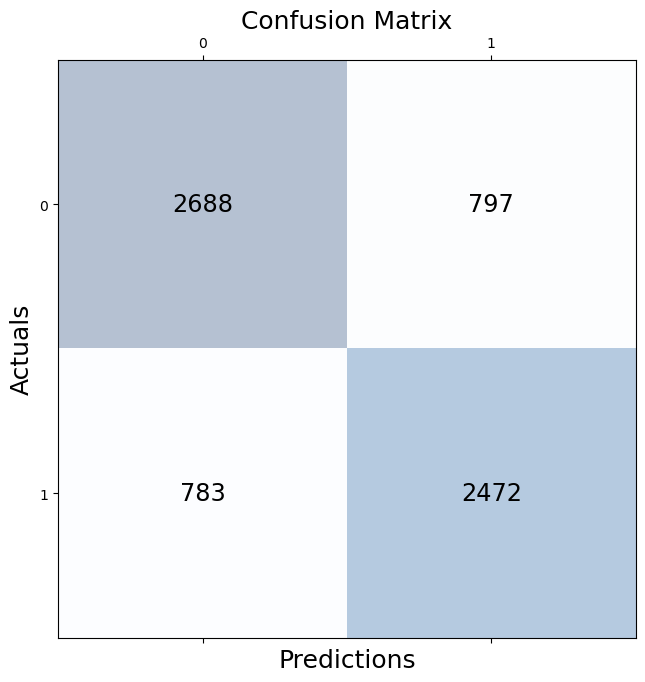

In [88]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(rf_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(rf_conf_matrix.shape[0]):
    for j in range(rf_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=rf_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<BarContainer object of 78 artists>

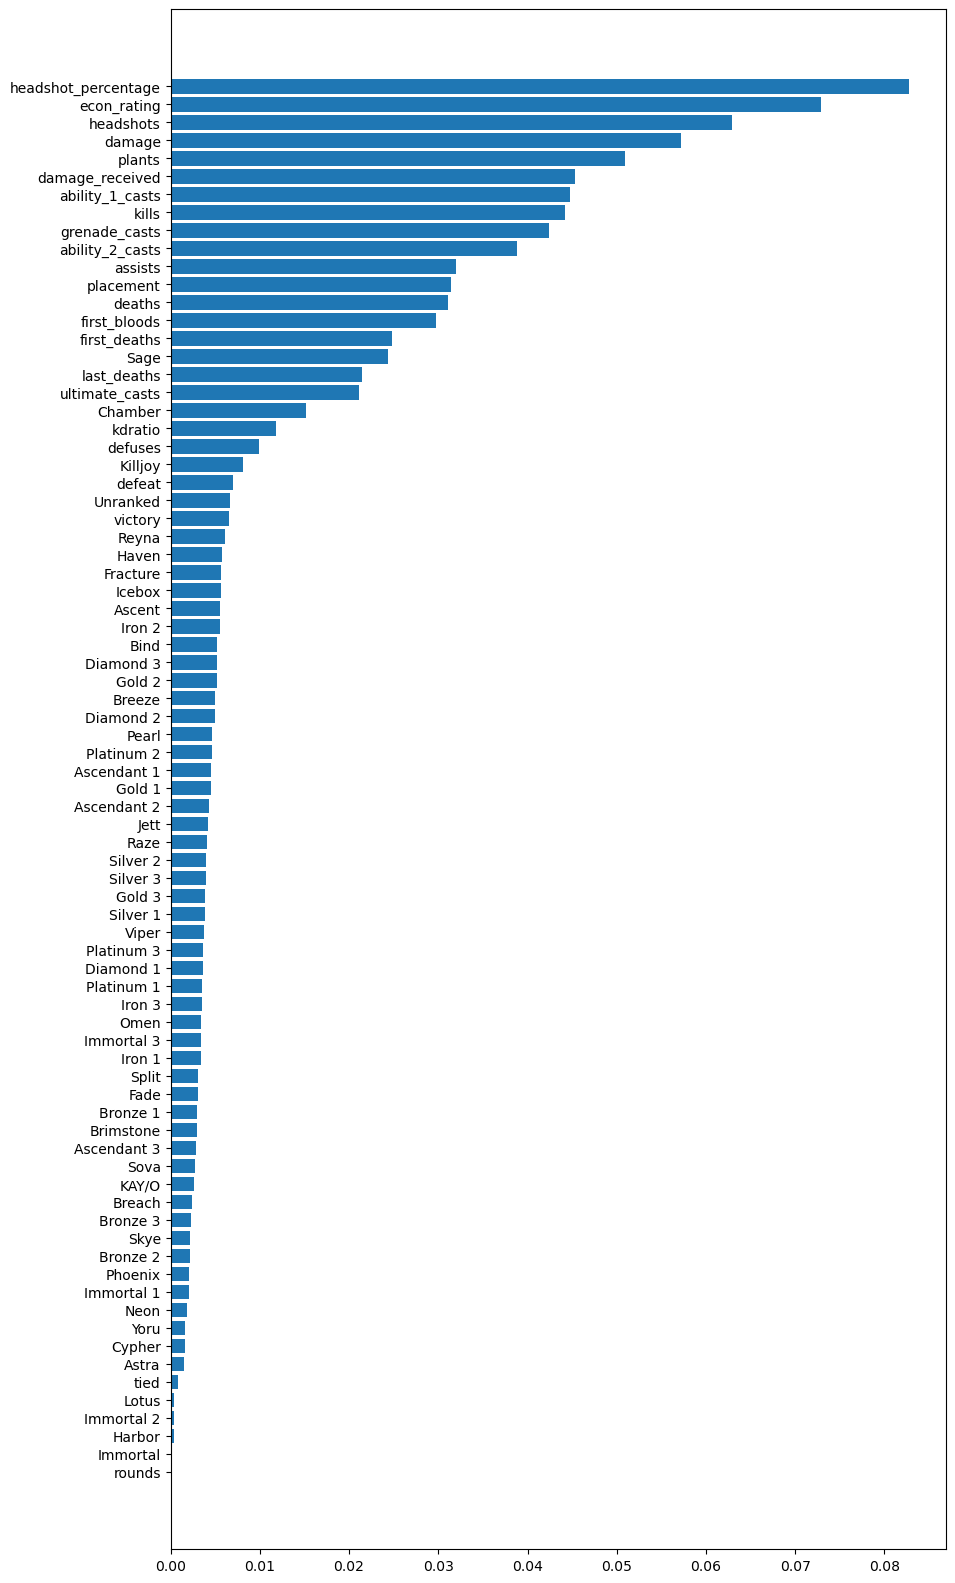

In [43]:
imp_df =  pd.DataFrame()
imp_df["feature"] = X_train.columns
imp_df["importance"] = rf.feature_importances_
imp_df_sorted = imp_df.sort_values(by=["importance"])
plt.figure(figsize=(10, 20))
plt.barh(imp_df_sorted["feature"], imp_df_sorted["importance"])

This plot is very interesting and provides some more insight on what attributes can be focused on to detect smurfs. Before it was assumed that kills, deaths and headshot percentage would be the most important traits for smurf detection but as we can see here 'econ_rating', 'damage_recieved', 'ability_1_casts' are also considered very important features. It is also interesting to see how different agent and ranks differ importance. 

In [52]:
top_features = imp_df_sorted["feature"][-10:]
top_features

12        ability_2_casts
11          grenade_casts
1                   kills
13        ability_1_casts
6         damage_received
8                  plants
5                  damage
2               headshots
7             econ_rating
17    headshot_percentage
Name: feature, dtype: object

Lets see what anomaly detection will look like with the 2 most important features.

Text(0.5, 1.0, 'headshot_percentage Vs econ_rating Outliers')

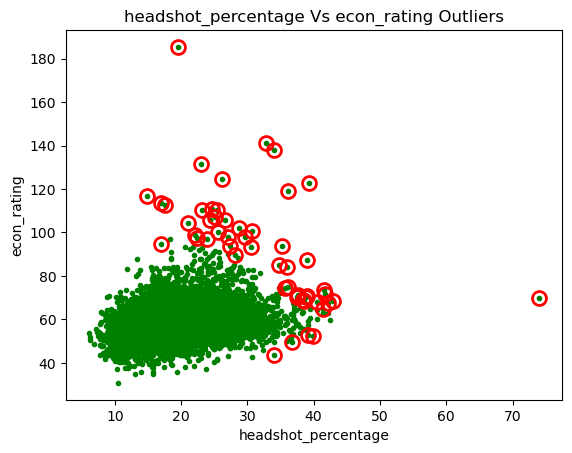

In [89]:
sub_data = df[["headshot_percentage", "econ_rating", "user_id"]]
avg_data = sub_data.groupby("user_id").mean()

from sklearn.ensemble import IsolationForest

isof = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.006))
clf = isof.fit(avg_data)

anomaly = clf.predict(avg_data)


test_anomaly = avg_data
test_anomaly["anomaly"] = anomaly.tolist()

anomalies = test_anomaly[(test_anomaly["anomaly"] == -1)]

anom_true = anomalies[(anomalies["anomaly"] == -1)]

plt.plot(avg_data["headshot_percentage"], avg_data["econ_rating"], 'g.')

plt.plot(anom_true["headshot_percentage"].to_numpy(), anom_true["econ_rating"].to_numpy(), 'or',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)
plt.xlabel("headshot_percentage")
plt.ylabel("econ_rating")
plt.title("headshot_percentage Vs econ_rating Outliers")